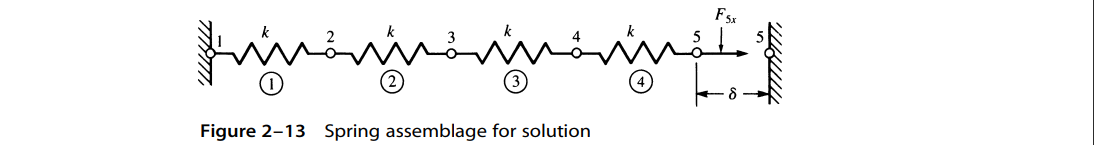

In [1]:
import pandas as pd 
import numpy as np 

Creating elements and nodes

In [2]:
columns = ['start','end','stiffness']
data = [[0,1,200000],[1,2,200000],[2,3,200000],[3,4,200000]]
elements = pd.DataFrame(data=data,columns=columns)

columns = ['displacement','load']
data = [[0,np.nan],[np.nan,0],[np.nan,0],[np.nan,0],[0.02,np.nan]]
nodes = pd.DataFrame(data=data,columns=columns)
print(elements)
print("--------------------------")
print(nodes)

   start  end  stiffness
0      0    1     200000
1      1    2     200000
2      2    3     200000
3      3    4     200000
--------------------------
   displacement  load
0          0.00   NaN
1           NaN   0.0
2           NaN   0.0
3           NaN   0.0
4          0.02   NaN


Creating global stiffness matrix

In [3]:
n = len(nodes)
K = np.zeros([n,n])
for i in range(n-1):
    e = elements.loc[i]
    start = e['start']
    end = e['end']
    k = np.zeros([n,n])
    idx = np.ix_([start,end],[start,end])
    k[idx] = e['stiffness']*np.array([[1,-1],[-1,1]])
    K = np.add(K,k)
print(K)

[[ 200000. -200000.       0.       0.       0.]
 [-200000.  400000. -200000.       0.       0.]
 [      0. -200000.  400000. -200000.       0.]
 [      0.       0. -200000.  400000. -200000.]
 [      0.       0.       0. -200000.  200000.]]


Solving element equations

In [4]:
A = nodes['displacement'].isna()
B = nodes['load'].isna()

KAA = K[np.ix_(A,A)]
KAB = K[np.ix_(A,B)]
KBA = K[np.ix_(B,A)]
KBB = K[np.ix_(B,B)]

In [5]:
U = nodes['displacement']
Uk = U[B]

P = nodes['load']
Pk = P[A]

Uuk = np.dot(np.linalg.inv(KAA),(Pk - np.dot(KAB,Uk)))
Puk = np.dot(KBA,Uuk) + np.dot(KBB,Uk)

In [6]:
results = nodes.copy()
results.loc[A,'displacement'] = Uuk
results.loc[B,'load'] = Puk
print("Nodal forces:")
print(results.load)
print("---------------------------")
print("Nodal displacements:")
print(results.displacement)

Nodal forces:
0   -1000.0
1       0.0
2       0.0
3       0.0
4    1000.0
Name: load, dtype: float64
---------------------------
Nodal displacements:
0    0.000
1    0.005
2    0.010
3    0.015
4    0.020
Name: displacement, dtype: float64


Local element forces

In [7]:
for i in range(n-1):
    e = elements.loc[i]
    start = e['start']
    end = e['end']
    k = e['stiffness']*np.array([[1,-1],[-1,1]])
    d = results.displacement[start:end+1]
    print("Local nodal forces for element {} (N): {}".format(i,np.dot(k,d)))
    print("-------------------------")

Local nodal forces for element 0 (N): [-1000.  1000.]
-------------------------
Local nodal forces for element 1 (N): [-1000.  1000.]
-------------------------
Local nodal forces for element 2 (N): [-1000.  1000.]
-------------------------
Local nodal forces for element 3 (N): [-1000.  1000.]
-------------------------
